In [31]:
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch import optim
from sklearn.datasets import load_digits
from torch.utils.data import TensorDataset, DataLoader

digits = load_digits()
X = digits.data
Y = digits.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)
k = 100
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
#訓練用データでデータローダを作成
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [32]:
train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    for i,(xx,yy) in enumerate(loader):
        y_pred = net(xx)
        loss = loss_fn(y_pred,yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss /i )
    y_pred = net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())
         
        

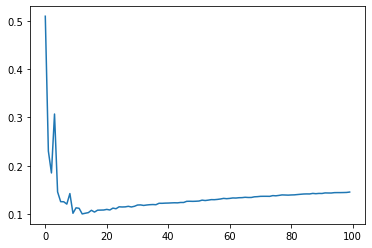

In [33]:
from matplotlib import pyplot as plt
plt.plot(test_losses)


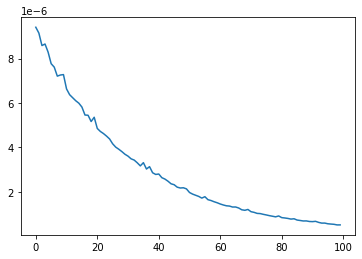

In [37]:
plt.plot(train_losses)

In [38]:
new_net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,10),
)

In [51]:
new_optimizer = optim.Adam(new_net.parameters())

train_losses = []
test_losses = []

for _ in range(100):
    running_loss = 0.0
    new_net.train()
    for i,(xx,yy) in enumerate(loader):
        y_pred = new_net(xx)
        loss = loss_fn(y_pred,yy)
        new_optimizer.zero_grad()
        loss.backward()
        new_optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss /i )
    new_net.eval()
    y_pred = new_net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())


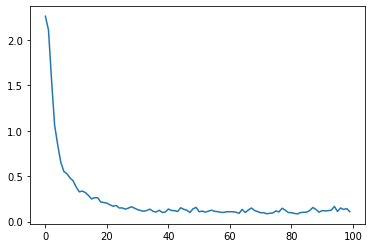

In [52]:
plt.plot(test_losses)

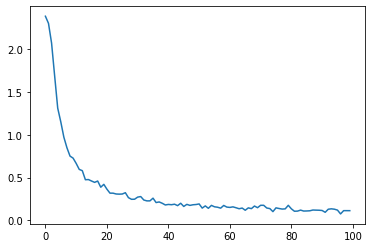

In [53]:
plt.plot(train_losses)